<a href="https://colab.research.google.com/github/qahaidari/fft-in-python-for-radar-applications/blob/main/phase_extraction_with_fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How to extract phase information of a signal using FFT even with small number of sampled points**

In [17]:
import numpy as np
import matplotlib.pyplot as plt

According to [Interpreting FFT results](https://www.gaussianwaves.com/2015/11/interpreting-fft-results-obtaining-magnitude-and-phase-information/), to extract phase information of a signal, first FFT is applied on the signal samples to extract the amplitude spectrum. Since the output of FFT is an array of complex values, the phase related to each frquency point can be calculated using the real and imaginary parts as follows:

\begin{align}
\phi = \arctan(\frac{\text{imag}}{\text{real}}) 
\end{align}

Not by looking at this phase spectrum, we can find out the phase of the frequency point at which max amplitude happens. Let's define an example signal

\begin{align}
f(t) = \text{cos}(2 \pi f t + \phi) 
\end{align}

, with the following sampling information:

In [55]:
N = 1000 # number of samples
t = np.linspace(0,1,N) # time vector with cycle period of 1 second 
dt = 1.0/N # sampling time 
fs = 1.0/dt # corresponding sampling frequency
omega = 2.0*np.pi*15.0 # our signal has main frequency 15 Hz 
phase = np.pi/8 # our signal phase

In [56]:
f_t = np.cos(omega*t+phase)

Since for real signals, negative frequencies after FFT are redundant, we should cut and use the positive frequencies only. In Python, `rfft` can be used to do FFT on real input data and negative frequency points are already excluded in its output; refer to [rfft documentation](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html#numpy.fft.rfft).

In [57]:
fft_f = np.fft.rfft(f_t) 

If $N$ is even, for real signals the FFT output has $(N/2) + 1$ points.

In [58]:
k = np.arange(0, N/2 + 1)
f_k = k * (fs / N) 

In [59]:
len(f_k)

501

In [60]:
# find phases and amplitudes for frequeny points
angles = np.arctan2(fft_f.imag, fft_f.real) * 180/np.pi # in degree
abs = 2/N * np.sqrt(fft_f.real**2 + fft_f.imag**2) # normalized amplitudes

In [61]:
len(abs)

501

(-180.0, 40.0)

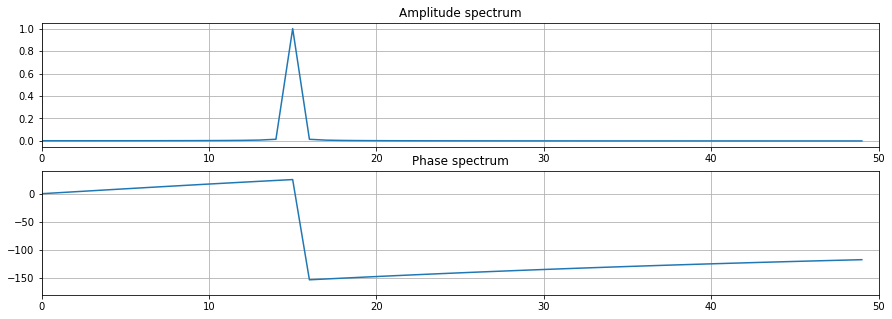

In [63]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.title("Amplitude spectrum")
plt.plot(f_k[:50], abs[:50])
plt.grid()
plt.xlim([0, 50])
plt.subplot(2, 1, 2)
plt.title("Phase spectrum")
plt.plot(f_k[:50], angles[:50])
plt.grid()
plt.xlim([0, 50])
plt.ylim([-180, 40])

In [64]:
freq_max = f_k[np.argmax(abs)]
phase_max = angles[np.argmax(abs)]
print("f:",freq_max,"Hz | Phase:",phase_max,"°")

f: 15.0 Hz | Phase: 25.17970987230643 °


The signal phase was $\frac{\pi}{8} = 22.5^\circ$. It is not accurately extracted. Let's see if we can make it better. 

The reason for not accurately extracting the phase information is small number of samples. Instead of increasing the number of samples, we use the following line, when defining the time sampling vector, to distribute the points evenly in `linspace` command; [More about linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace).

`t, dt = np.linspace(0, 1, N, endpoint=False, retstep=True)`

Then even with a small number of points, we can get an accurate value for the phase.

In [65]:
N = 1000
t, dt = np.linspace(0, 1, N, endpoint=False, retstep=True) 
fs = 1.0/dt
omega = 2.0*np.pi*15.0 
phase = np.pi/8

f_t = np.cos(omega*t+phase)
fft_f = np.fft.rfft(f_t) 
k = np.arange(0, N/2 + 1)
f_k = k * (fs / N) 

angles = np.arctan2(fft_f.imag, fft_f.real) * 180/np.pi
abs = 2/N * np.sqrt(fft_f.real**2 + fft_f.imag**2)

freq_max = f_k[np.argmax(abs)]
phase_max = angles[np.argmax(abs)]
print("f:",freq_max,"Hz | Phase:",phase_max,"°")

f: 15.0 Hz | Phase: 22.499999999999698 °
